In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv("/content/nepal_earthquakes_1990_2026.csv")
df.head(10)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-12-07T02:43:07.342Z,29.8698,80.9384,43.404,4.4,mb,21.0,166.0,8.856,0.94,...,2025-12-26T01:20:25.040Z,"37 km E of Dārchulā, Nepal",earthquake,13.18,9.350,0.144,14.0,reviewed,us,us
1,2025-12-04T11:59:01.015Z,29.1109,87.0043,10.000,4.1,mb,36.0,168.0,3.646,1.26,...,2025-12-27T14:38:45.040Z,"130 km N of Lobuche, Nepal",earthquake,10.55,1.930,0.103,26.0,reviewed,us,us
2,2025-11-10T22:44:15.027Z,29.1757,86.8367,10.000,4.2,mb,14.0,164.0,3.779,0.57,...,2025-12-01T01:43:29.040Z,"136 km N of Lobuche, Nepal",earthquake,12.27,1.963,0.199,7.0,reviewed,us,us
3,2025-11-03T20:57:22.312Z,28.5267,87.3673,10.000,4.7,mb,64.0,79.0,3.493,0.77,...,2025-11-23T19:51:34.188Z,"84 km NE of Lobuche, Nepal",earthquake,9.64,1.872,0.058,89.0,reviewed,us,us
4,2025-10-21T14:59:40.611Z,29.0245,85.3683,10.000,4.1,mb,25.0,163.0,5.072,0.44,...,2025-11-13T19:11:33.040Z,"35 km SSE of Saga, China",earthquake,9.46,1.840,0.103,26.0,reviewed,us,us
5,2025-10-14T19:23:30.898Z,29.6390,81.4210,10.000,4.6,mb,76.0,45.0,8.445,0.76,...,2026-01-01T23:11:13.040Z,"62 km NE of Dipayal, Nepal",earthquake,9.45,1.886,0.076,51.0,reviewed,us,us
6,2025-10-02T00:18:52.698Z,29.0247,86.7789,10.000,4.3,mb,18.0,163.0,3.855,0.75,...,2025-12-19T22:50:29.040Z,"119 km N of Lobuche, Nepal",earthquake,10.65,1.932,0.153,12.0,reviewed,us,us
7,2025-09-13T21:03:04.502Z,28.9970,86.6568,10.000,4.3,mb,26.0,163.0,3.966,0.85,...,2025-12-03T03:58:24.040Z,"117 km N of Lobuche, Nepal",earthquake,12.53,1.939,0.119,21.0,reviewed,us,us
8,2025-09-12T21:42:10.839Z,29.1796,87.0157,10.000,5.0,mb,73.0,73.0,3.624,0.75,...,2025-12-03T03:58:15.040Z,"137 km N of Lobuche, Nepal",earthquake,7.30,1.476,0.044,165.0,reviewed,us,us
9,2025-08-28T14:00:32.485Z,30.0555,84.3549,10.000,4.4,mb,21.0,131.0,22.604,0.58,...,2025-11-19T21:59:42.040Z,"116 km NW of Saga, China",earthquake,9.63,1.864,0.096,31.0,reviewed,us,us


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1536 entries, 0 to 1535
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             1536 non-null   object 
 1   latitude         1536 non-null   float64
 2   longitude        1536 non-null   float64
 3   depth            1536 non-null   float64
 4   mag              1536 non-null   float64
 5   magType          1536 non-null   object 
 6   nst              725 non-null    float64
 7   gap              1167 non-null   float64
 8   dmin             733 non-null    float64
 9   rms              1532 non-null   float64
 10  net              1536 non-null   object 
 11  id               1536 non-null   object 
 12  updated          1536 non-null   object 
 13  place            1536 non-null   object 
 14  type             1536 non-null   object 
 15  horizontalError  717 non-null    float64
 16  depthError       954 non-null    float64
 17  magError      

In [28]:
# Mengubah kolom time ke format datetime
df["time"] = pd.to_datetime(df["time"])

# Mengambil year untuk analisis tren tahunan
df["year"] = df["time"].dt.year

In [29]:
df.isnull().sum()

,0
time,0
latitude,0
longitude,0
depth,0
mag,0
magType,0
nst,811
gap,369
dmin,803
rms,4


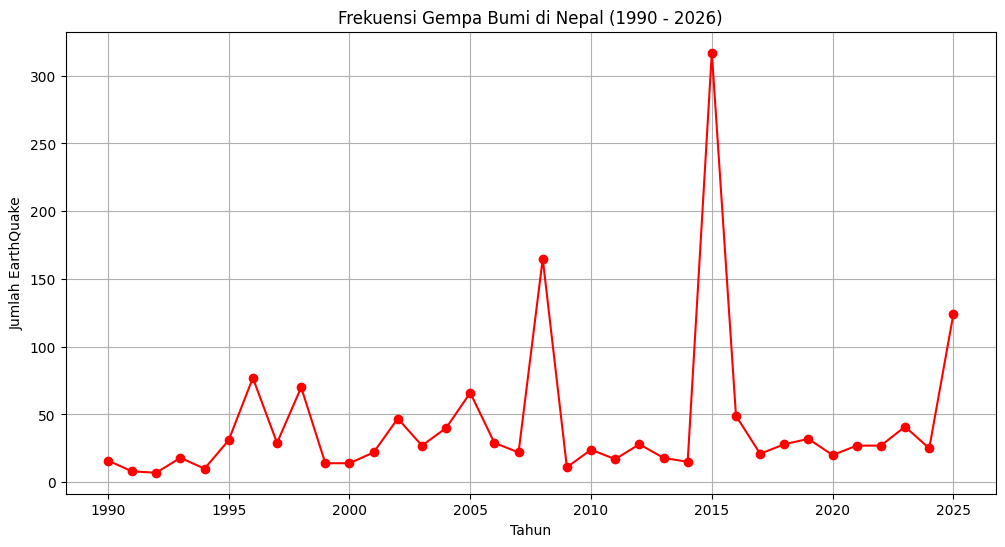

In [30]:
# Tren Earthquake Per Tahun

plt.figure(figsize=(12,6))
df["year"].value_counts().sort_index().plot(kind="line", marker = "o", color="red")
plt.title("Frekuensi Gempa Bumi di Nepal (1990 - 2026)")
plt.xlabel("Tahun")
plt.ylabel("Jumlah EarthQuake")
plt.grid(True)
plt.show()

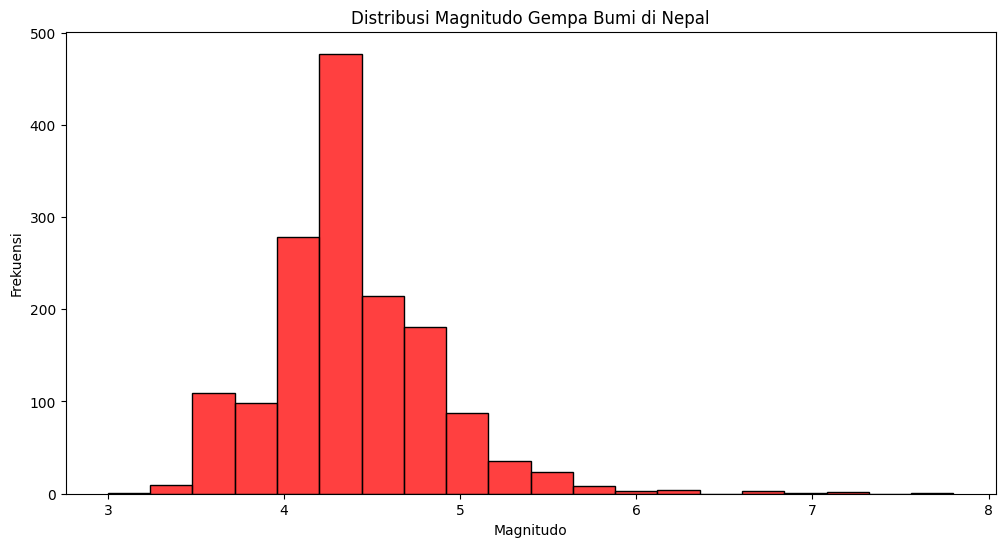

In [31]:
# Distribusi Magnitudo

plt.figure(figsize=(12,6))
sns.histplot(df["mag"], bins=20, color="red")
plt.title("Distribusi Magnitudo Gempa Bumi di Nepal")
plt.xlabel("Magnitudo")
plt.ylabel("Frekuensi")
plt.show()

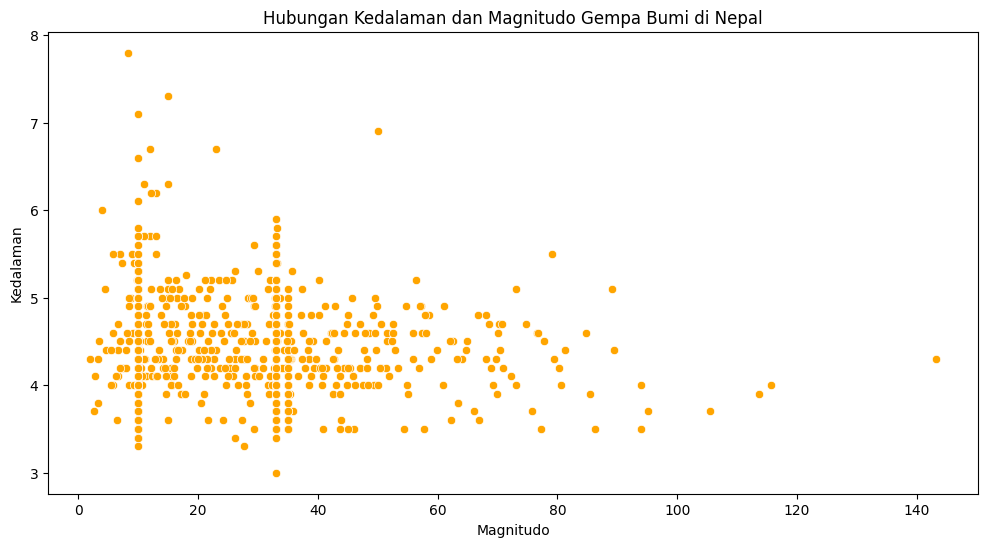

In [32]:
# Hubungan Kedalaman dan Magnitudo

plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x="depth", y="mag", color="orange")
plt.title("Hubungan Kedalaman dan Magnitudo Gempa Bumi di Nepal")
plt.xlabel("Magnitudo")
plt.ylabel("Kedalaman")
plt.show()

In [33]:
import plotly.express as px

# Menghapus baris yang mungkin memiliki nilai koordinat atau magnitudo kosong
df_clean = df.dropna(subset=["latitude", "longitude", "mag"])

# Membuat peta sebaran gempa
fig = px.scatter_mapbox(
    df_clean,
    lat="latitude",
    lon="longitude",
    color="mag",
    size="mag",
    hover_name="place",
    hover_data=["time", "depth"],
    color_continuous_scale=px.colors.sequential.Plasma,
    size_max=15,
    zoom=5,
    height=600,
    mapbox_style="carto-positron",
    title="Peta Sebaran Gempa Bumi Nepal (1990 - 2026)"
)
#fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r": 0, "t": 40, "l": 0, "b": 0})
fig.show()

In [34]:
# Filter gempa dengan magnitudo >= 6.0
gempa_besar = df[df["mag"]>= 6.0].sort_values(by="mag", ascending=False)
gempa_besar[["time", "place", "mag", "depth"]].head(10)

,time,place,mag,depth
704,2015-04-25 06:11:25.950000+00:00,"67 km NNE of Bharatpur, Nepal",7.8,8.22
545,2015-05-12 07:05:19.730000+00:00,Nepal,7.3,15.00
122,2025-01-07 01:05:16.734000+00:00,2025 Southern Tibetan Plateau Earthquake,7.1,10.00
778,2011-09-18 12:40:51.830000+00:00,"43 km NW of Mangan, India",6.9,50.00
615,2015-04-26 07:09:10.670000+00:00,"21 km SSE of Kod?ri??, Nepal",6.7,22.91
961,2008-08-25 13:21:58.820000+00:00,"221 km NE of Jumla, Nepal",6.7,12.00
692,2015-04-25 06:45:21.320000+00:00,"71 km NNE of Bharatpur, Nepal",6.6,10.00
538,2015-05-12 07:36:54.490000+00:00,"42 km SSE of Kod?ri??, Nepal",6.3,15.00
1094,2005-04-07 20:04:41.060000+00:00,"196 km NE of Jumla, Nepal",6.3,11.00
1128,2004-07-11 23:08:44.180000+00:00,"213 km NE of Jumla, Nepal",6.2,13.00


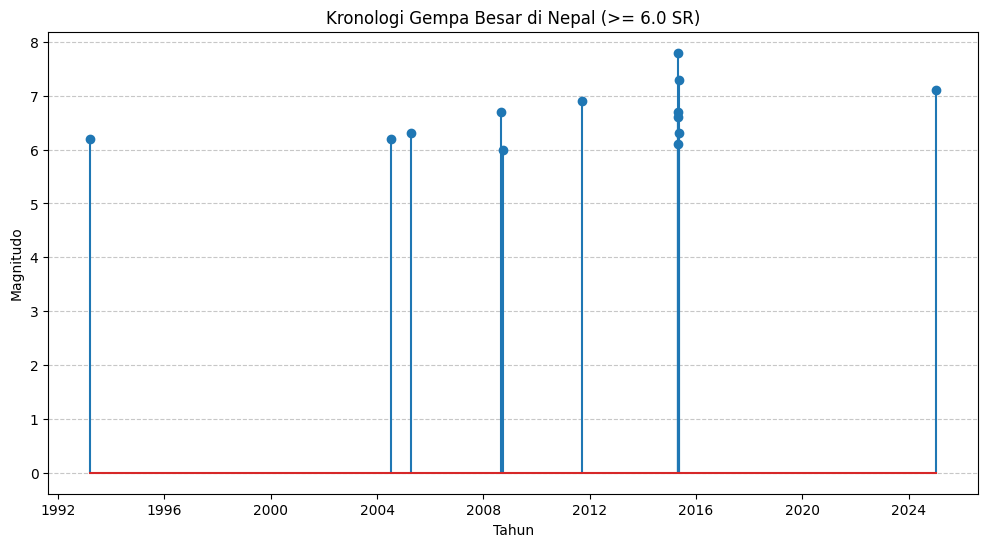

In [35]:
# Visualisasi Khusus Gempa Besar

plt.figure(figsize=(12,6))
plt.stem(gempa_besar["time"], gempa_besar["mag"])
plt.title("Kronologi Gempa Besar di Nepal (>= 6.0 SR)")
plt.xlabel("Tahun")
plt.ylabel("Magnitudo")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [36]:
# Menghitung korelasi Pearson
korelasi = df["depth"].corr(df["mag"])
print(f"Korelasi Pearson antara kedalaman dan magnitudo: {korelasi:.4f}")

Korelasi Pearson antara kedalaman dan magnitudo: -0.0519


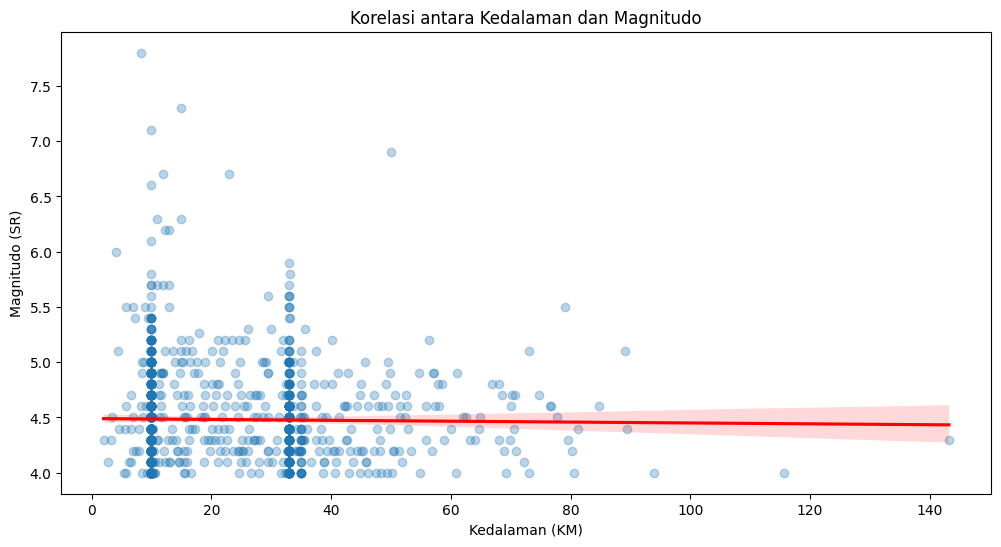

In [37]:
plt.figure(figsize=(12,6))
sns.regplot(data=df[df["mag"] >= 4.0], x="depth", y="mag", scatter_kws={"alpha":0.3}, line_kws={"color": "red"})
plt.title("Korelasi antara Kedalaman dan Magnitudo")
plt.xlabel("Kedalaman (KM)")
plt.ylabel("Magnitudo (SR)")
plt.show()